In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('Total Emissions Per Country (2000-2020).csv')
data = pd.DataFrame(dataset)
data = data.reset_index(drop=True)
if 'Unit' in data.columns:
    data = data.drop('Unit', axis=1)
df_s = data.drop(index = dataset[data['Area'] != 'Greece'].index)
df_final = df_s.drop(index = df_s[df_s['Item'] != 'All sectors without LULUCF'].index) # The df variable refers to the dataframe with LULUCF


The logic behind dropping the Unit columns is that it is always the same variable value so it is unneccessary in this analysis. I decided to only analyse farming emissions in Greece because I was scared my laptop would explode with how underpowered it is so I chose to chop down the data size to ensure it would run properly. The reason for reseting the data was because when I ran "data = data.drop('Unit', axis=1)" it acted as if it didn't exist in the dataframe despite me seeing it when I printed it. I further reduced the data to total emmissions per unit to get a better idea of the overall emmissions in a readable graph instead of a confusing graph with many lines. I chose to exclude LULUCF because it was introduced later on and I wanted to get a wider view of the emissions data 

In [3]:
import matplotlib.pyplot as mlp
import numpy as np

In [4]:
df_final = df_final[df_final['Area'] == 'Greece'].drop('Item', axis=1) #Dropping the item columns since it's no longer needed for the non LULUCF data

In [5]:
melted_df = df_final.melt(id_vars=['Area', 'Element'], var_name='Year', value_name='Emissions') #Melting the year columns into a single column to make 7 different charts for each emission type and visualise the yearly change in each category


In [6]:
df_element = {element: melted_df[melted_df['Element'] == element].copy() for element in melted_df['Element'].unique()}

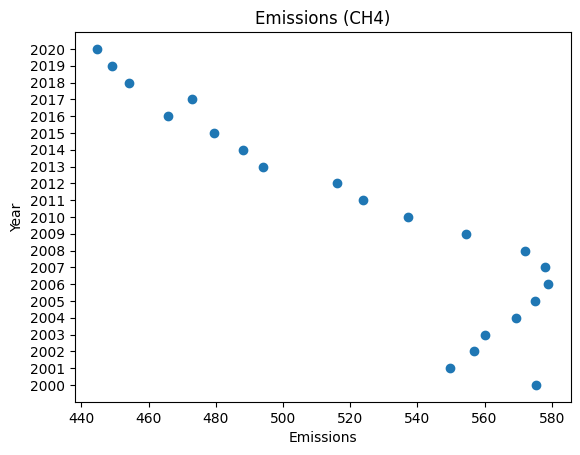

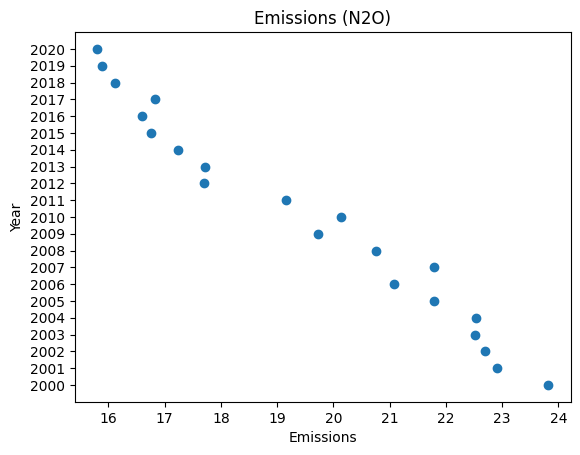

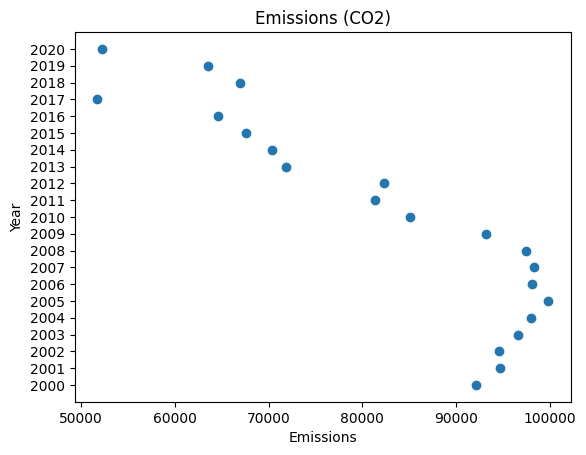

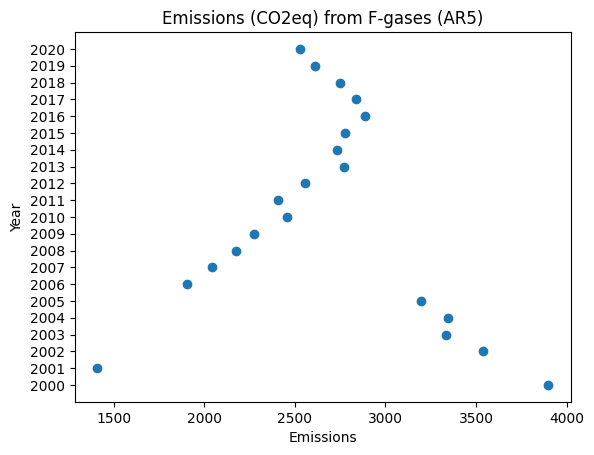

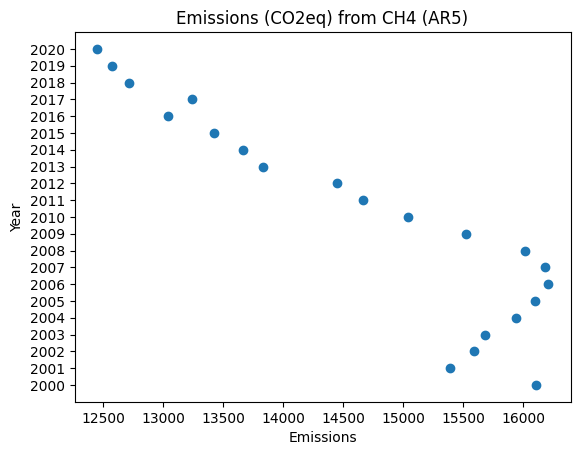

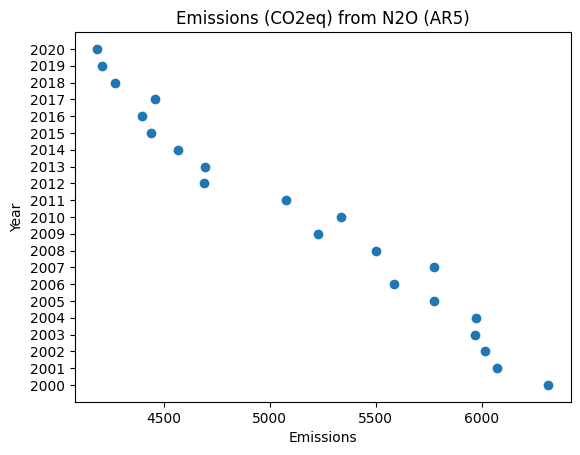

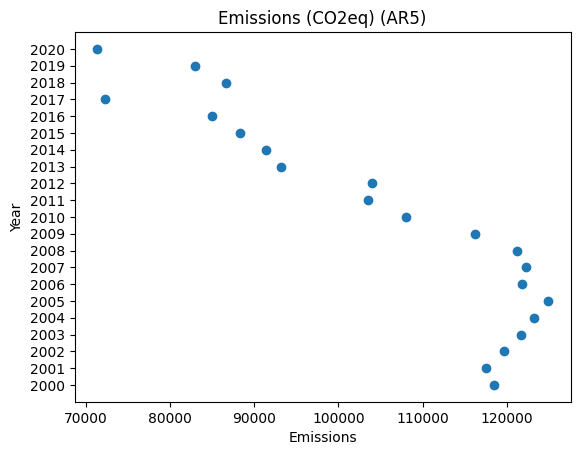

In [7]:
for element, df in df_element.items():
    fig, ax = mlp.subplots()
    ax.set_title(element)
    ax.scatter(df['Emissions'], df['Year'])
    ax.set_xlabel('Emissions')
    ax.set_ylabel('Year')
    mlp.show()